In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Datasets/Normalized_CWE-119.csv.gz')

In [3]:
df.head()

,Unnamed: 0,testID,filename,code,vuln,type
0,0,0,cwe119_0.c,"trace_readlink_cbk (call_frame_t *frame, void ...",True,CWE-119
1,1,1,cwe119_1.c,inet6name(const unsigned char *in6)\n{\n\tchar...,True,CWE-119
2,2,2,cwe119_2.c,"rootfs_mount(struct file_system_type *fs_type,...",False,CWE-119
3,3,3,cwe119_3.c,"locate_srv_conf_1(krb5_context context, const ...",True,CWE-119
4,4,4,cwe119_4.c,"ohci_start_iso(struct fw_iso_context *base,\n\...",False,CWE-119


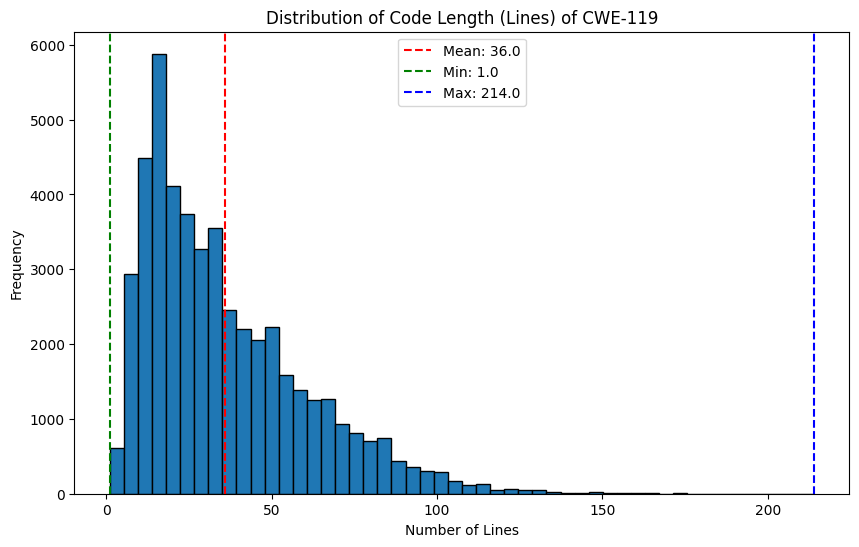

In [21]:
# Calculate number of lines for each code sample
line_counts = df['code'].str.count('\n') + 1

# Create a histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(line_counts, bins=50, edgecolor='black')
plt.title('Distribution of Code Length (Lines) of CWE-119')
plt.xlabel('Number of Lines')
plt.ylabel('Frequency')
plt.axvline(line_counts.mean(), color='red', linestyle='dashed', label=f'Mean: {line_counts.mean():.1f}')
plt.axvline(line_counts.min(), color='green', linestyle='dashed', label=f'Min: {line_counts.min():.1f}')
plt.axvline(line_counts.max(), color='blue', linestyle='dashed', label=f'Max: {line_counts.max():.1f}')
plt.legend()

In [17]:
df.loc[line_counts.idxmin()]

Unnamed: 0                                                 3690
testID                                                     3690
filename                                          cwe119_3690.c
code          flop(C c){ R c=='('?')':c=='['?']':c=='{'?'}':c;}
vuln                                                      False
type                                                    CWE-119
Name: 3690, dtype: object

In [18]:
df.loc[line_counts.idxmax()]['code']

'AutoVacMain(int argc, char *argv[])\n{\n\tListCell   *cell;\n\tList\t   *dblist;\n\tautovac_dbase *db;\n\tTransactionId xidForceLimit;\n\tbool\t\tfor_xid_wrap;\n\tsigjmp_buf\tlocal_sigjmp_buf;\n\n\t/* we are a postmaster subprocess now */\n\tIsUnderPostmaster = true;\n\tam_autovacuum = true;\n\n\t/* reset MyProcPid */\n\tMyProcPid = getpid();\n\n\t/* Identify myself via ps */\n\tinit_ps_display("autovacuum process", "", "", "");\n\n\tSetProcessingMode(InitProcessing);\n\n\t/*\n\t * If possible, make this process a group leader, so that the postmaster\n\t * can signal any child processes too.  (autovacuum probably never has\n\t * any child processes, but for consistency we make all postmaster\n\t * child processes do this.)\n\t */\n#ifdef HAVE_SETSID\n\tif (setsid() < 0)\n\t\telog(FATAL, "setsid() failed: %m");\n#endif\n\n\t/*\n\t * Set up signal handlers.\tWe operate on databases much like a regular\n\t * backend, so we use the same signal handling.  See equivalent code in\n\t * tcop/

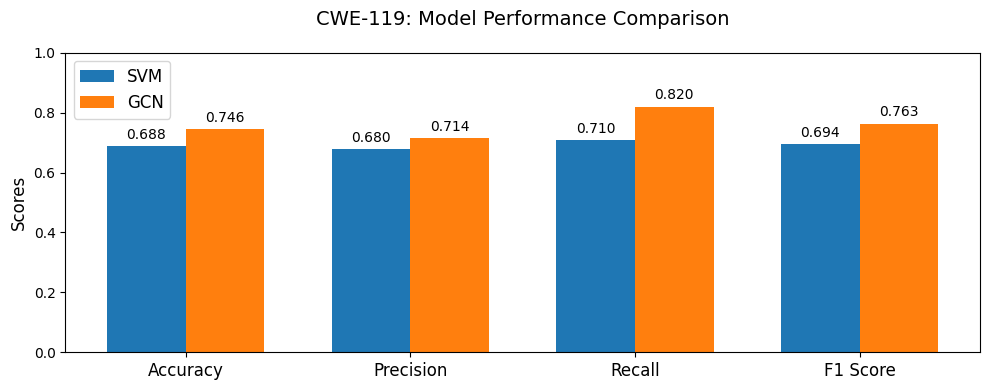

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['SVM', 'GCN']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_scores = [0.6883, 0.6797, 0.7095, 0.6943]
gnn_scores = [0.7464, 0.7138, 0.8204, 0.7634]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 4))
rects1 = ax.bar(x - width/2, svm_scores, width, label='SVM', color='#1f77b4')
rects2 = ax.bar(x + width/2, gnn_scores, width, label='GCN', color='#ff7f0e')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('CWE-119: Model Performance Comparison', fontsize=14, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(fontsize=12)
ax.set_ylim(0, 1.0)

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()